In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]

Cubic spline for i-th grid segment is defined as: 𝑆3,𝑖=𝑎0,𝑖+𝑎1,𝑖(𝑥−𝑥𝑖)+𝑎2,𝑖(𝑥−𝑥𝑖)2+𝑎3,𝑖(𝑥−𝑥𝑖)3

### 2. Formulate the functional and differential compatibility conditions [mathematical formula]

Functional compatibility condition: 𝑆(𝑥𝑖)=𝑓(𝑥𝑖),𝑥𝑖∈Ω
Differential compatibility condition: 𝑆″(𝑥𝑖)=𝑓″(𝑥𝑖) -> 𝑆3(𝑥)∈𝐶2[𝑎,𝑏]

### 3. Formulate stitching conditions [mathematical formula]

𝑆′𝑛(𝑥𝑖)=𝑆′𝑛+1(𝑥𝑖)

### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]

Smoothness required: 𝑆 (𝑥) ∈𝐶2 [𝑎, 𝑏]
𝐶2 - is defined as a class of functions

Differential and cross-linking conditions guarantee the continuity of 𝑆 (𝑝) 𝑚 (𝑥) in all internal nodes 𝑥𝑖
All cubic splines are polynomials of the third degree - all second derivatives exist and are continuous.

⇒ The first and second derivatives of S (x) exist on all grids Ω𝑛 [a, b] and within grid segments.

⇒ 𝑆3 (𝑥) ∈𝐶2 [𝑎, 𝑏]

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

$x_1 -> x_i$

$x_2 -> x_{i+1}$

$x_3 -> x_{i+2}$

$h_i = (x_{i+1}-x_i)$

$h_{i+1} = (x_{i+2}-x_{i+1})$

$S_{3,i}''(x_i)h_i + 2(h_i+h_{i+1})S_{3,i+1}''(x_{i+1}) + S_{3,i+2}''(x_{i+2})h_{i+1} = 6\left[\frac{(S_{3,i+2}(x_{i+2})-S_{3,i+1}(x_{i+1}))}{h_{i+1}} - \frac{(S_{3,i+1}(x_{i+1})-S_{3,i}(x_i))}{h_i}\right]$

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

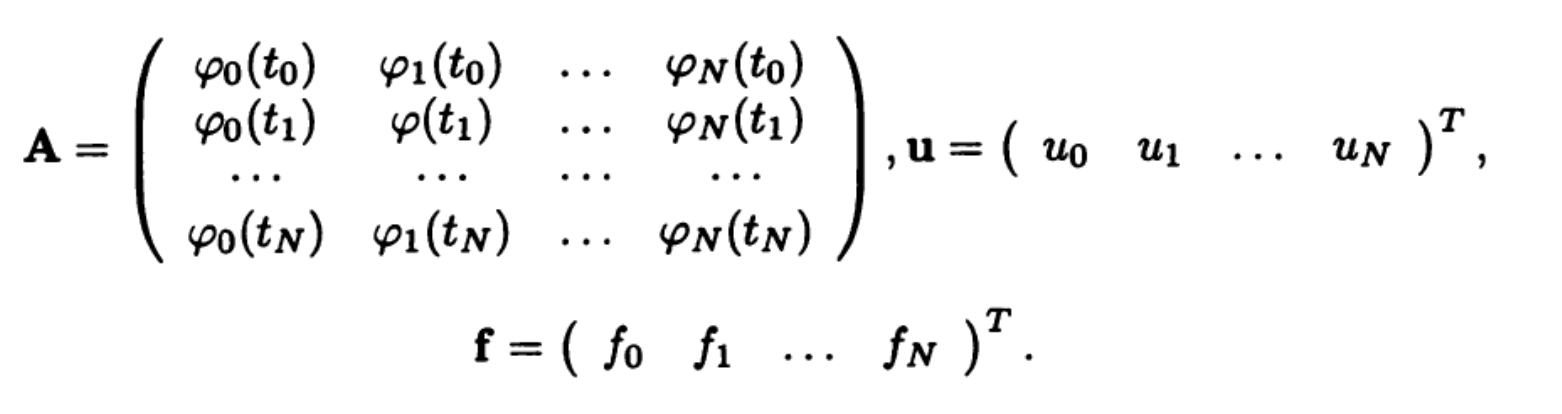

### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

This system is not closed because M_i is in the range from 0 to n, while we have only 1 to n-1 ⇒ we need 2 more equations to solve this system

### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

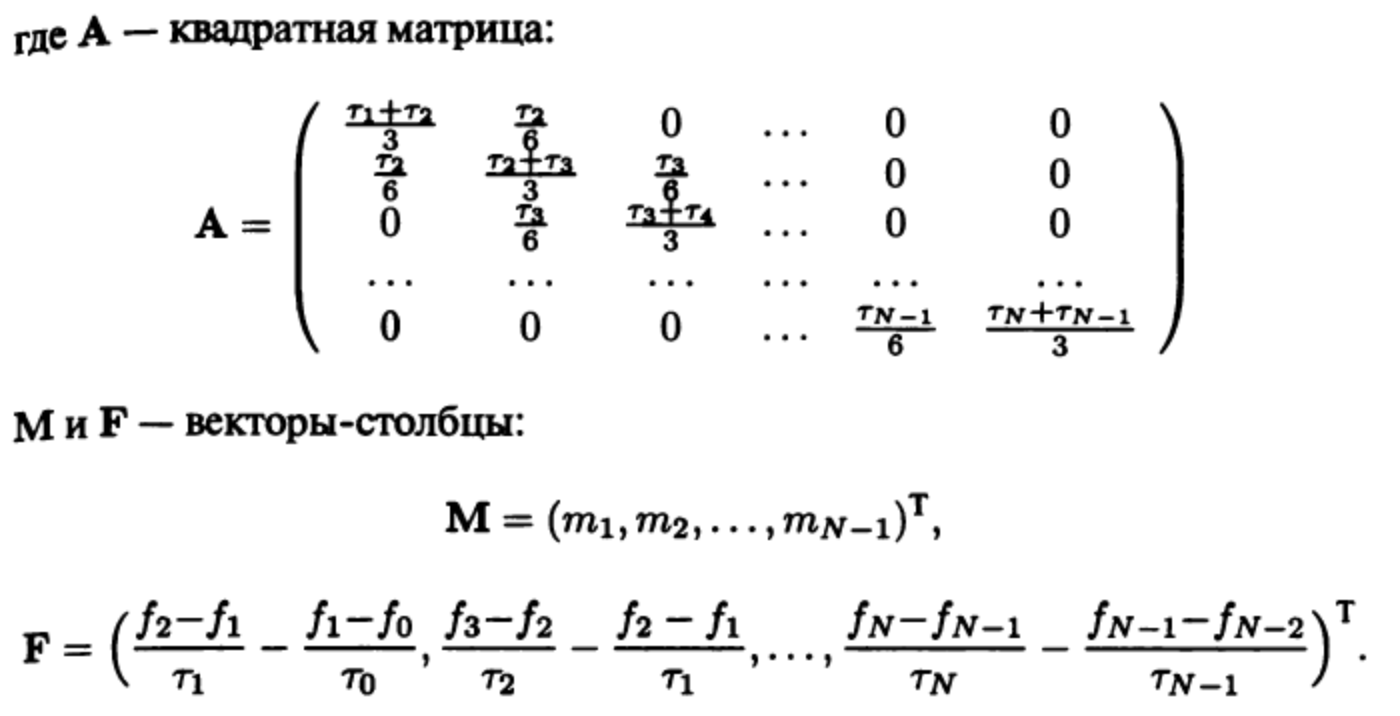

### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

YOUR TEXT/CODE HERE

### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

In [ ]:
def tridiagonal_matrix_solve(matrix):
  pass

def obtain_spline_weights(x, y, m):
  pass

def build_matrix(x, y):
  pass

def cubic_spline(x, y):
  matrix = build_matrix(x, y)
  m_vector = tridiagonal_matrix_solve(matrix)
  a = obtain_spline_weights(x, y, m_vector)
  return a

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

YOUR TEXT/CODE HERE










### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

Tridiagonal Matrix algorithm = $O(N)$

### Congrats!